In [1]:
import os
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical

In [2]:
category = os.listdir('dataset/train')
category

['pants', 'shirt', 'shorts', 't-shirt']

In [3]:
img = os.listdir('dataset/train/'+category[0])[0]
img

'01.jpg'

In [4]:
def preprocessing(dirpath):
    array = []
    for cat in category:
        path = os.path.join(dirpath, cat)
        for img in os.listdir(path):
            imgarray = cv2.imread(os.path.join(path, img))/255.
            imgarray = tf.image.resize(imgarray, (224, 224))
            array.append([imgarray, cat])
    return array

In [5]:
train = preprocessing('dataset/train')
test = preprocessing('dataset/test')

In [6]:
import random 
random.shuffle(train)
random.shuffle(test)

In [7]:
len(train)

160

In [8]:
X_train = []
y_train = []
for features, lables in train:
    X_train.append(features)
    y_train.append(lables)
    
X_test = []
y_test = []
for features, lables in test:
    X_test.append(features)
    y_test.append(lables)

In [9]:
len(X_train), len(X_test)

(160, 40)

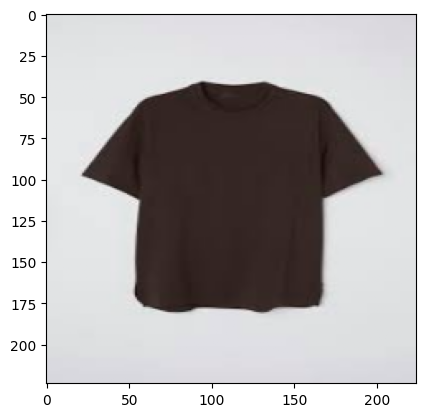

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [11]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [12]:
base_model.trainable = False

In [13]:
model = models.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation = 'relu'),
        layers.Dense(4, activation='softmax')
    ]
)

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


In [19]:
y_test = label_encoder.transform(y_test)
y_test = to_categorical(y_test)

In [22]:
y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [26]:
model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6341 - loss: 1.0025 - val_accuracy: 0.4375 - val_loss: 1.0372
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5828 - loss: 0.9374 - val_accuracy: 0.4375 - val_loss: 1.0628
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5901 - loss: 0.9770 - val_accuracy: 0.6250 - val_loss: 0.9181
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7354 - loss: 0.9131 - val_accuracy: 0.5625 - val_loss: 0.8756
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6975 - loss: 0.7998 - val_accuracy: 0.6875 - val_loss: 0.8499
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6907 - loss: 0.8536 - val_accuracy: 0.6250 - val_loss: 0.9088
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6613 - loss: 0.8143 - val_accuracy: 0.6875 - val_loss: 0.7978
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7859 - loss: 0.7466 - val_accuracy: 0.6250 - val_loss: 0.7871
Epoch 9/

In [24]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 982ms/step - accuracy: 0.6792 - loss: 0.6453


[0.6426172256469727, 0.675000011920929]

In [28]:
import pickle
with open('model.keras', 'wb') as f:
    pickle.dump(model, f)

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model1 = load_model('model.keras')

In [31]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,894,542 (114.04 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,204,554 (16.04 MB)